# **1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/clustering_nutrisi/final_hasil.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Data Splitting**

In [ ]:
X = df.drop(columns=["label_hasil"])
y = df["label_hasil"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [ ]:
# Model 1: Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Model 2: Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## **b. Evaluasi Model Klasifikasi**

In [ ]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Decision Tree F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       516
           2       1.00      1.00      1.00       330
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00       289
           5       1.00      1.00      1.00       291

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting F1-Score:", f1_score(y_test, y_pred_gb, average='weighted'))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 1.0
Gradient Boosting F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       516
           2       1.00      1.00      1.00       330
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00       289
           5       1.00      1.00      1.00       291

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

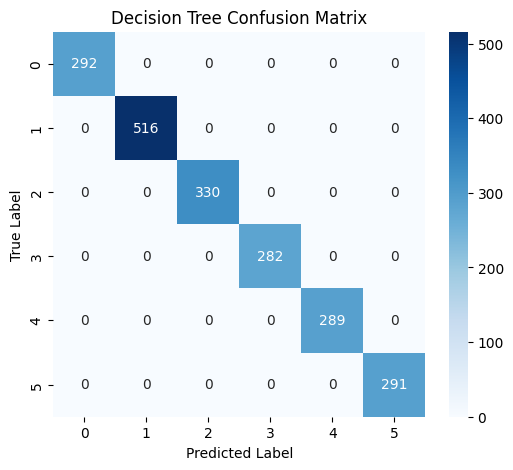

In [ ]:
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

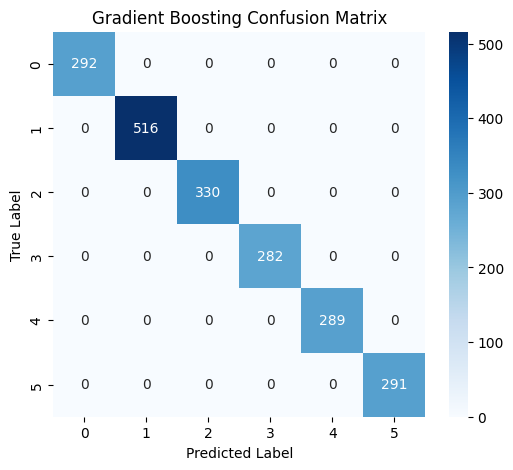

In [ ]:
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting Confusion Matrix")

## Ringkasan Performa Model Klasifikasi

Berdasarkan hasil evaluasi terhadap tiga model klasifikasi, berikut adalah ringkasan performanya:

 1. Decision Tree Classifier:

* **Akurasi**: 100%
* **F1-Score**: 100%

Model ini menunjukkan performa sempurna, tanpa kesalahan klasifikasi pada seluruh kelas.

* **Interpretasi Confusion Matrix**: Tidak ditemukan kesalahan klasifikasi di seluruh kelas, semua prediksi tepat 100%.

2. Gradient Boosting Classifier:

* **Akurasi**: 100%
* **F1-Score**: 100%

Sama seperti Decision Tree, model ini juga memberikan hasil sempurna dengan precision dan recall 100% di seluruh kelas.

* **Interpretasi Confusion Matrix**: Tidak ada kesalahan klasifikasi yang terdeteksi, semua prediksi benar di semua kelas.

Perbandingan Model:

Kedua model (Decision Tree dan Gradient Boosting) menghasilkan performa sempurna dengan akurasi dan f1-score mencapai 100%.

Gradient Boosting dan Decision Tree sangat cocok digunakan untuk dataset ini karena mampu memisahkan label dengan sangat baik.

## **C. Tuning Model Klasifikasi Salah satu algoritma yaitu Decision Tree**

In [ ]:
param_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Params Decision Tree:", grid_dt.best_params_)
print("Best Score Decision Tree:", grid_dt.best_score_)


Best Params Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Score Decision Tree: 1.0


## **d. Evaluasi Model setelah Tuning**

Tuned Decision Tree Accuracy: 1.0
Tuned Decision Tree F1-Score: 1.0


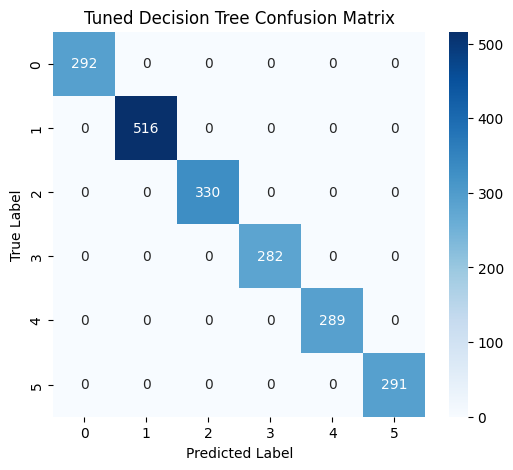

In [ ]:
best_dt = grid_dt.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print("Tuned Decision Tree F1-Score:", f1_score(y_test, y_pred_dt_tuned, average='weighted'))
plot_confusion_matrix(y_test, y_pred_dt_tuned, "Tuned Decision Tree Confusion Matrix")

Tuned Decision Tree Accuracy on Test Data: 1.0

Classification Report on Test Data:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       292
           1     1.0000    1.0000    1.0000       516
           2     1.0000    1.0000    1.0000       330
           3     1.0000    1.0000    1.0000       282
           4     1.0000    1.0000    1.0000       289
           5     1.0000    1.0000    1.0000       291

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000



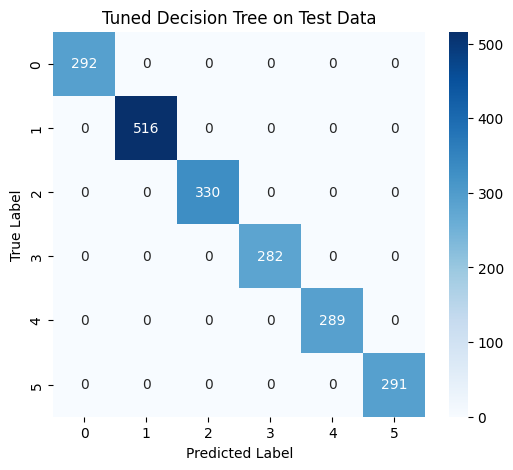

In [ ]:
y_pred_dt_tuned = grid_dt.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt_tuned)
report = classification_report(y_test, y_pred_dt_tuned, digits=4)
print("Tuned Decision Tree Accuracy on Test Data:", accuracy)
print("\nClassification Report on Test Data:\n", report)
plot_confusion_matrix(y_test, y_pred_dt_tuned, "Tuned Decision Tree on Test Data")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## Evaluasi Model  Algoritma Decision Tree

1. Performa Model:

* **Sebelum Tuning**:
    * Model mencapai akurasi sempurna (100%) pada data train dan test.
    * Menunjukkan pemisahan antar kelas yang sangat jelas.
* **Setelah Tuning**:
    * Dengan parameter terbaik (`criterion='gini'`, `max_depth=5`, `min_samples_split=2`), model tetap mempertahankan akurasi sempurna (100%) di data test.
    * Tuning memberikan batasan pada kedalaman pohon (`max_depth=5`) yang membantu mengurangi kompleksitas model tanpa menurunkan performa.

2. Kelemahan Model:

* Meskipun tidak terdapat kesalahan klasifikasi pada dataset ini, potensi overfitting tetap harus diwaspadai.
* Akurasi sempurna ini bisa saja disebabkan oleh dataset yang sangat terpisah (hasil PCA & clustering).

3. Akurasi Akhir Model:

* Akurasi di train set (CV GridSearch): 1.0 (100%)
* Akurasi di test set: 1.0 (100%)